In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#train_test_split
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
data = pd.read_csv('./train.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size=0.2, random_state=42)

In [72]:
model = Sequential([
    Dense(128, input_shape=[784], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,            
    patience=3,           
    verbose=1,             
    mode='min',             
    baseline=None,          
    restore_best_weights=True 
)

c:\Users\thanh\anaconda3\envs\data\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[early_stopping])

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7703 - loss: 0.7408 - val_accuracy: 0.9424 - val_loss: 0.1961
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9166 - loss: 0.2711 - val_accuracy: 0.9539 - val_loss: 0.1492
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9339 - loss: 0.2124 - val_accuracy: 0.9562 - val_loss: 0.1402
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9444 - loss: 0.1749 - val_accuracy: 0.9656 - val_loss: 0.1548
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9485 - loss: 0.1659 - val_accuracy: 0.9645 - val_loss: 0.1304
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9535 - loss: 0.1483 - val_accuracy: 0.9656 - val_loss: 0.1996
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9555 - loss: 0.1459 - val_accuracy: 0.9708 - val_loss: 0.1260
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9584 - loss: 0.1277 - 

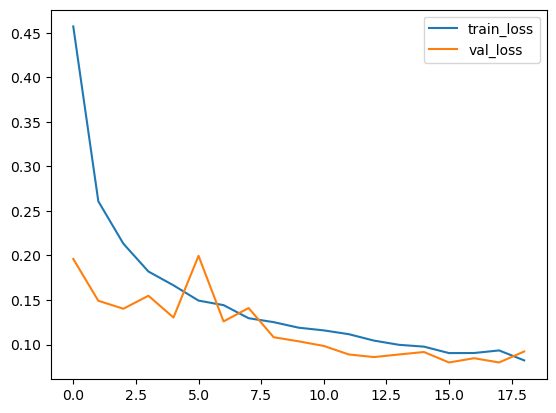

In [74]:
# plot the history loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [75]:
#Create a submission file
test = pd.read_csv('./test.csv')
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)
submission = pd.DataFrame({'ImageId': range(1, 28001), 'Label': predictions})
submission.to_csv('submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step
